In [99]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from matplotlib.cm import viridis

# Set the default DPI for plots
mpl.rcParams['figure.dpi'] = 200  # Set the DPI to 300 for higher quality display


### Data Collection


In [80]:
def simulate_tokens(days, lambda_value, collaborative_prob, collaborative_bonus=1.5, tokens_per_order=10):
    """
    Simulate the number of tokens a player will have after a given number of days.
    
    Parameters:
    - days (int): The number of days to simulate.
    - lambda_value (float): The lambda parameter for the Poisson distribution (average number of orders per day).
    - collaborative_prob (float): The probability that a given order is a collaborative project.
    - collaborative_bonus (float): The multiplier for tokens received from collaborative projects.
    - tokens_per_order (int): The number of tokens received per crafting order.
    
    Returns:
    - total_tokens (int): The total number of tokens accumulated over the given days.
    """
    total_tokens = 0
    tokens_per_collaborative_order = tokens_per_order * collaborative_bonus
    
    for day in range(days):
        # Simulate the number of orders for the day using a Poisson distribution
        total_orders = np.random.poisson(lambda_value)
        total_orders = min(total_orders, 4) # Cap the number of orders at 4
        
        # Initialize number of projects (0 at the start of the day)
        collaborative_projects, regular_orders = 0, 0
        for _ in range(total_orders):
            # Determine if the order is a collaborative project
            if np.random.rand() < collaborative_prob:
                collaborative_projects += 1
            else:
                regular_orders += 1
        
        total_tokens += regular_orders * tokens_per_order
        total_tokens += collaborative_projects * tokens_per_collaborative_order
        
    return total_tokens

def monte_carlo_simulation(n_simulations, days, lambda_value, collaborative_prob, collaborative_bonus=1.5, tokens_per_order=10):
    """
    Run a Monte Carlo simulation over the player base.
    
    Parameters:
    - n_simulations (int): The number of simulations to run.
    - other parameters: See simulate_tokens function.
    
    Returns:
    - results (list): A list of total tokens accumulated in each simulation.
    """
    results = []
    for _ in range(n_simulations):
        total_tokens = simulate_tokens(days, lambda_value, collaborative_prob, collaborative_bonus, tokens_per_order)
        results.append(total_tokens)
    return results

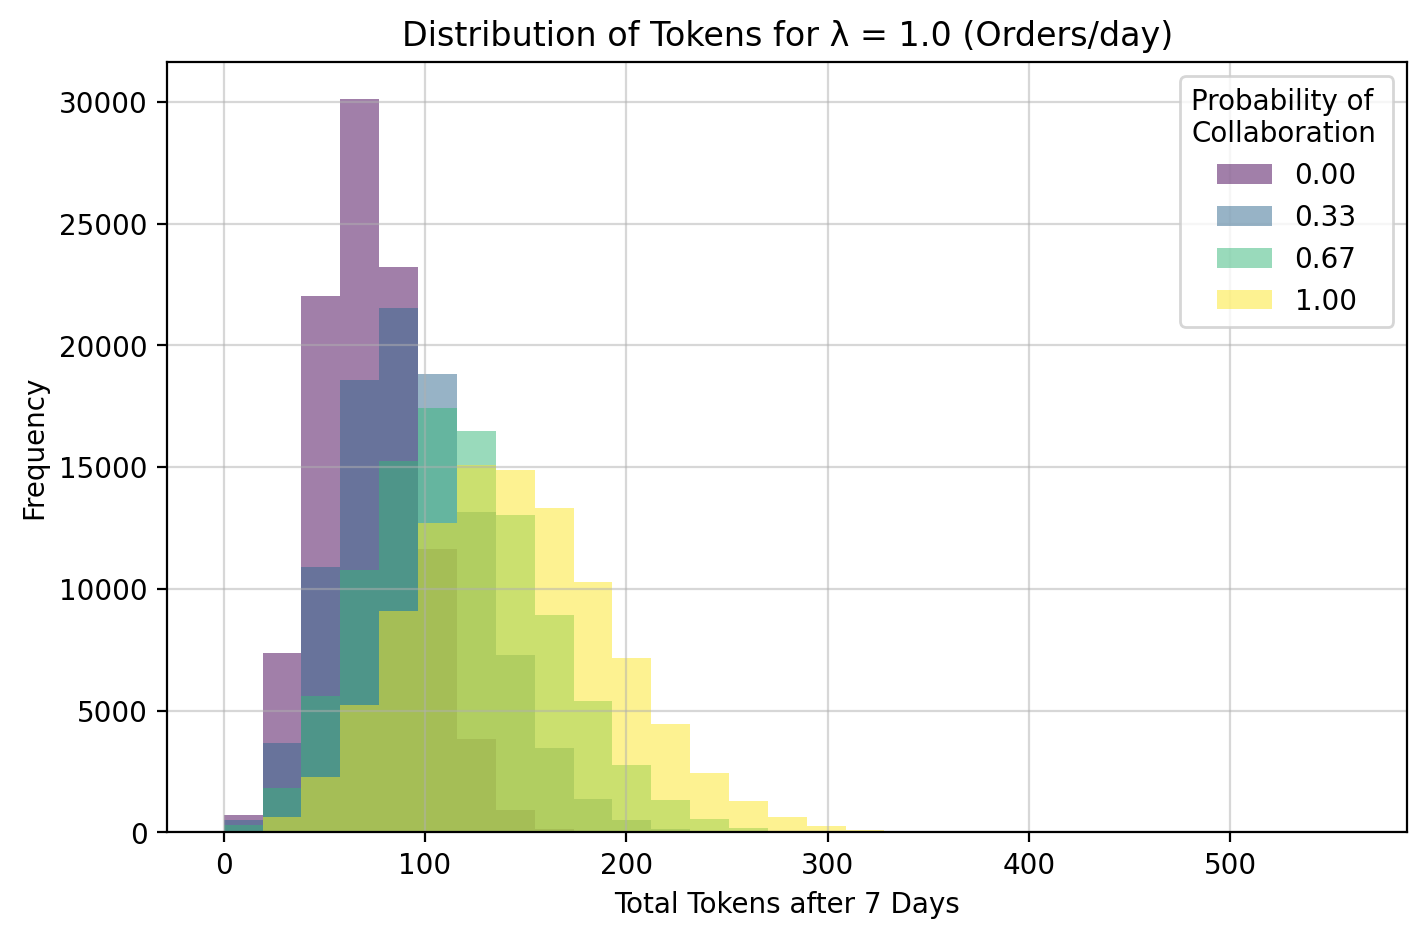

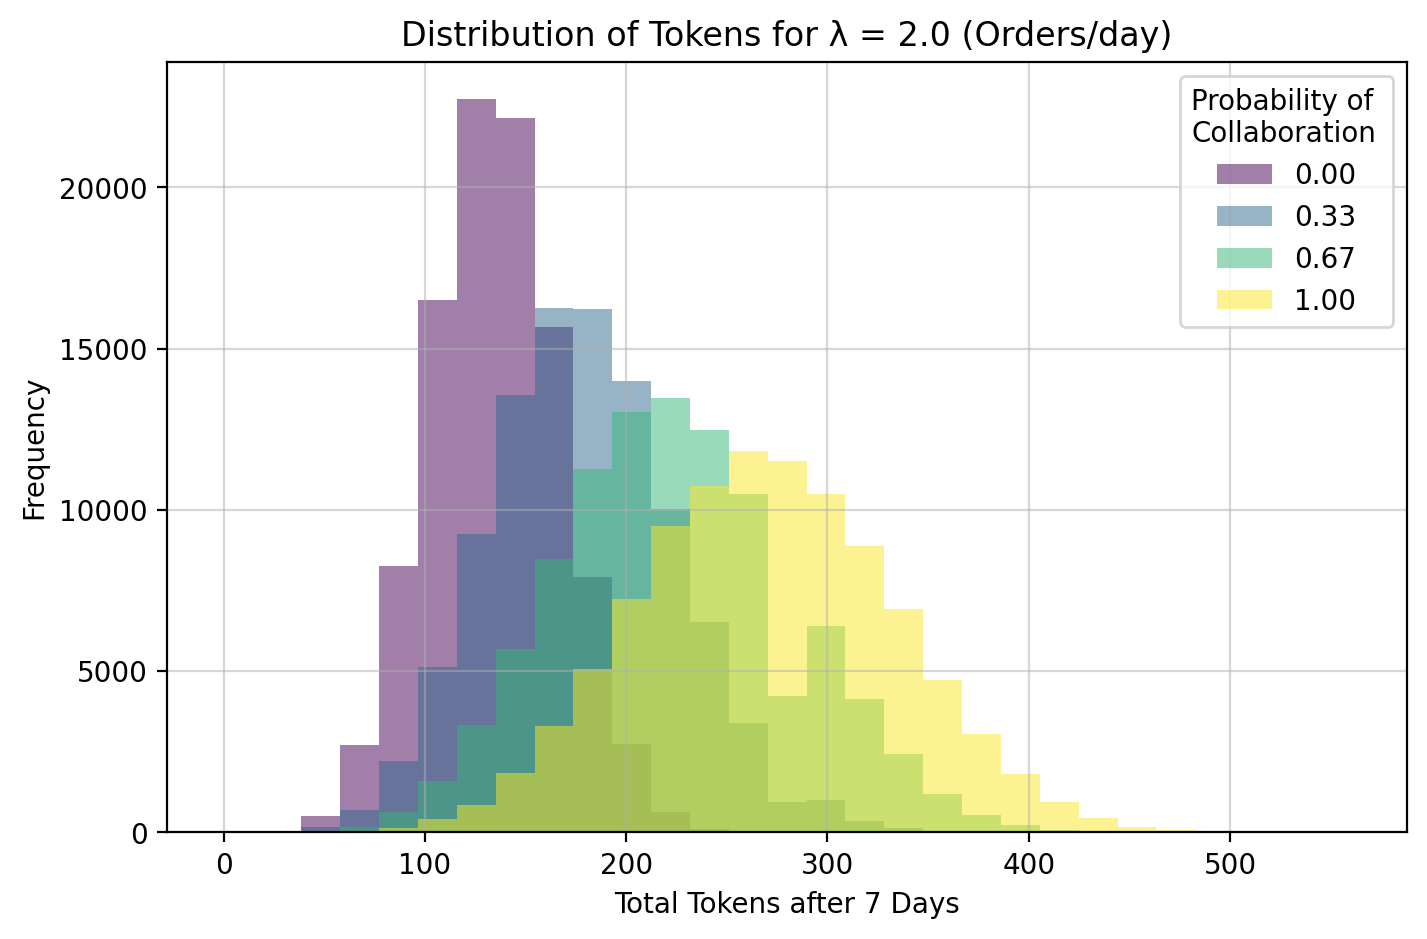

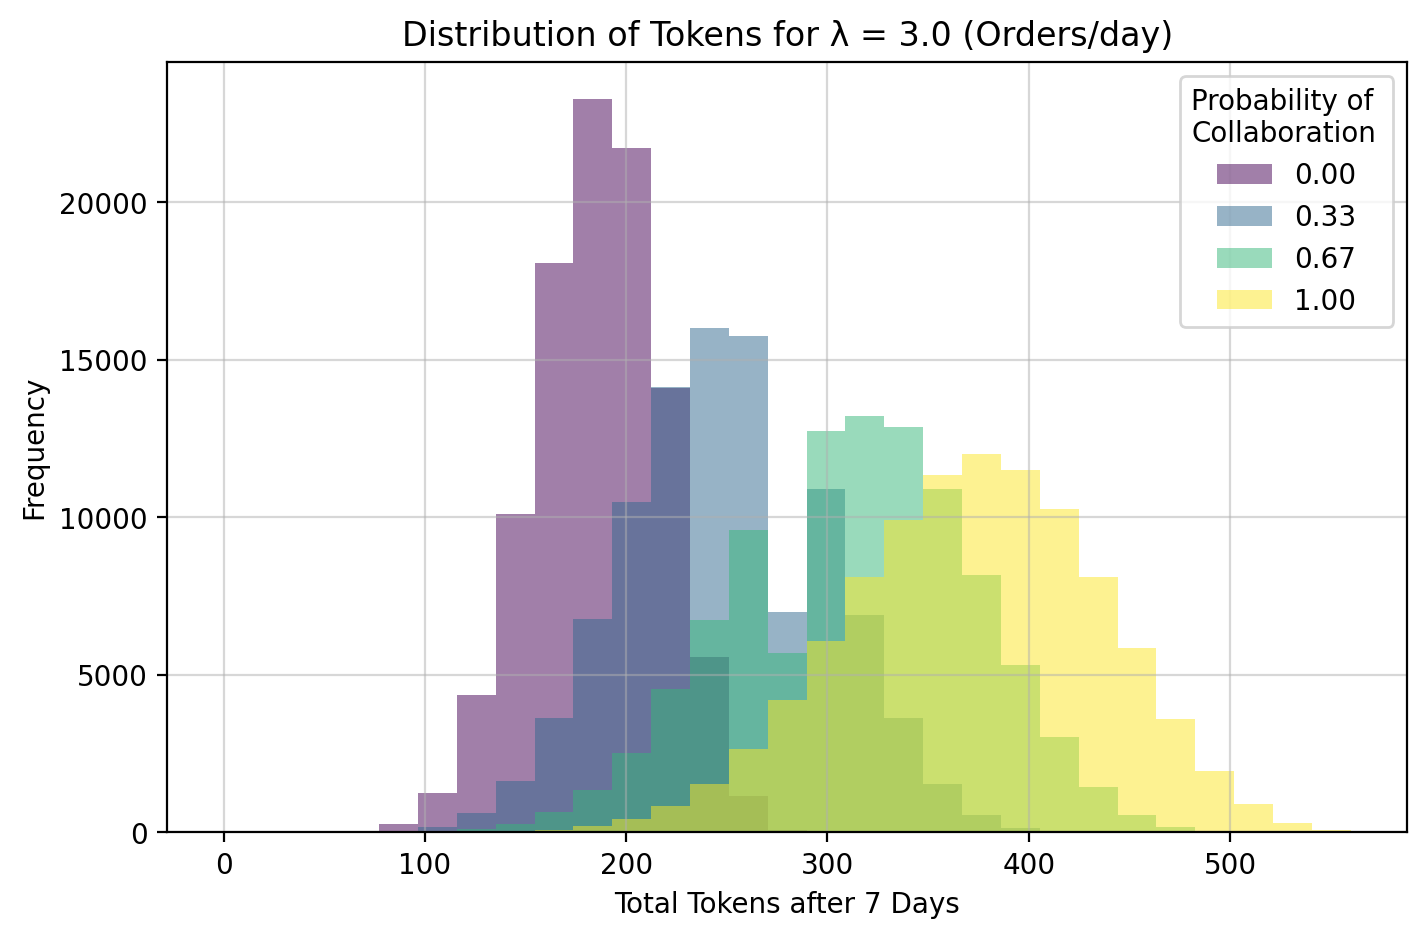

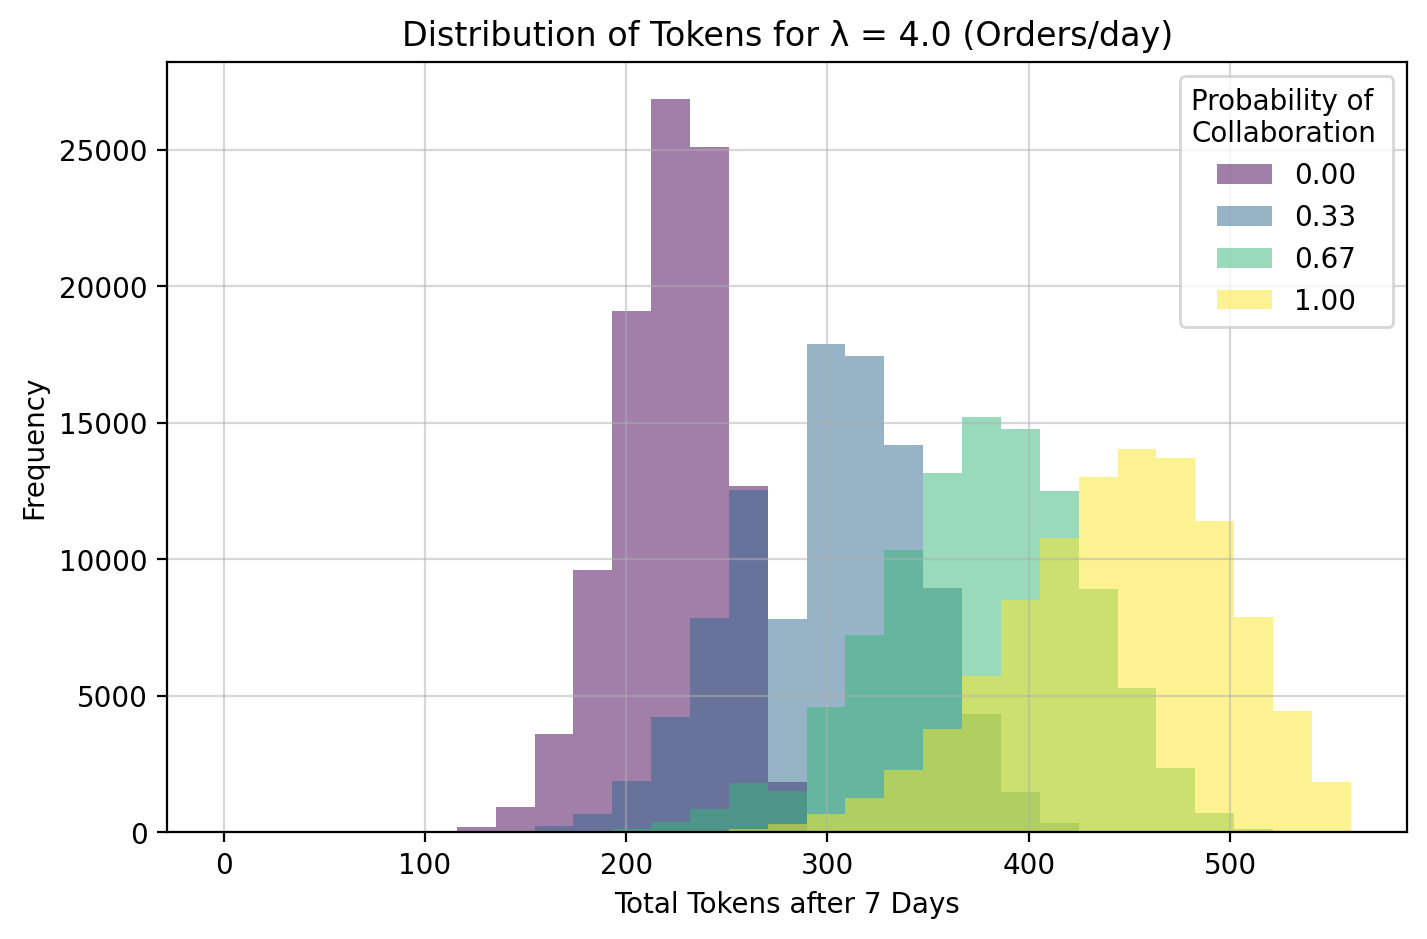

In [110]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import viridis

# Parameters
days = 7
lambda_values = [1.0, 2.0, 3.0, 4.0]  # Example lambda values
collaborative_probs = np.linspace(0, 1, 4)  # Range from 0 to 1 (inclusive) with 0.25 increments
collaborative_bonus = 2.0
tokens_per_order = 10
n_simulations = 100000  # Number of simulations for Monte Carlo

# Run Monte Carlo simulations and find min and max total tokens
all_results = []
for lambda_value in lambda_values:
    for collaborative_prob in collaborative_probs:
        results = monte_carlo_simulation(n_simulations, days, lambda_value, collaborative_prob, collaborative_bonus, tokens_per_order)
        all_results.extend(results)

# Define common bins based on min and max total tokens
min_total_tokens = min(all_results)
max_total_tokens = max(all_results)
bins = np.linspace(min_total_tokens, max_total_tokens, 30)

# Get the colors from the Viridis colormap
colors = [viridis(i) for i in np.linspace(0, 1, len(collaborative_probs))]

# Run Monte Carlo simulations and plot histograms with common bins
for lambda_value in lambda_values:
    plt.figure(figsize=(8, 5))
    for i, collaborative_prob in enumerate(collaborative_probs):
        results = monte_carlo_simulation(n_simulations, days, lambda_value, collaborative_prob, collaborative_bonus, tokens_per_order)
        
        plt.hist(results, bins=bins, alpha=0.5, label=f'{collaborative_prob:.2f}', color=colors[i])
    
    plt.xlabel(f'Total Tokens after {days} Days')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of Tokens for λ = {lambda_value} (Orders/day)')
    plt.legend(title="Probability of \nCollaboration")
    plt.grid(True, alpha=0.5)
    plt.show()
